In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns


from scipy import stats

from eda_utilities import print_eda_stats
from data_pipeline import dockless_data_pipeline
from data_pipeline import weather_data_pipeline



In [2]:
# Read the dockless data from S3 bucket
# Load the data and and call the clean method automatically to call the work flow
dockless_data = pd.read_csv("https://s3.amazonaws.com/sameera-bucket-1/dockless_mobility/raw_data/Austin_Dockless_Vehicle_Trips.csv")
dockless_vehicles_columns = dockless_data.columns
print_eda_stats(dockless_data, dockless_vehicles_columns, "Austin Dockless Mobility Data")
# Call the dockless_data_pipeline()
dockless_data_pipeline(dockless_data)
dockless_vehicles_columns = dockless_data.columns
print_eda_stats(dockless_data, dockless_vehicles_columns, "Austin Dockless Mobility Data")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


+--------------------------+---------+-------------+---------------+--------------+-------------------+
|       Column Name        |  dtype  | Total_Count | Unique_Values | df_totalrows | Null Value counts |
+--------------------------+---------+-------------+---------------+--------------+-------------------+
|            ID            |  object |   2746505   |    2746505    |   2746505    |         0         |
|        Device ID         |  object |   2746505   |     26999     |   2746505    |         0         |
|       Vehicle Type       |  object |   2746504   |       3       |   2746505    |         1         |
|      Trip Duration       | float64 |   2746504   |     10521     |   2746505    |         1         |
|      Trip Distance       | float64 |   2746504   |     16125     |   2746505    |         1         |
|        Start Time        |  object |   2746504   |     25694     |   2746505    |         1         |
|         End Time         |  object |   2746504   |     25768  

In [3]:
#Read the weather data from S3 bucket
weather_data = pd.read_csv("https://s3.amazonaws.com/sameera-bucket-1/dockless_mobility/raw_data/Austin_Bergstom_Airport_Weather.csv")
weather_columns = weather_data.columns
print_eda_stats(weather_data, weather_columns, "Austin Weather Data")
weather_data_pipeline(weather_data)
weather_columns = weather_data.columns
print_eda_stats(weather_data, weather_columns, "Austin Weather Data")

+-----------------+---------+-------------+---------------+--------------+-------------------+
|   Column Name   |  dtype  | Total_Count | Unique_Values | df_totalrows | Null Value counts |
+-----------------+---------+-------------+---------------+--------------+-------------------+
|     STATION     |  object |     436     |       1       |     436      |         0         |
|       NAME      |  object |     436     |       1       |     436      |         0         |
|     LATITUDE    | float64 |     436     |       1       |     436      |         0         |
|    LONGITUDE    | float64 |     436     |       1       |     436      |         0         |
|    ELEVATION    | float64 |     436     |       1       |     436      |         0         |
|       DATE      |  object |     436     |      436      |     436      |         0         |
|       AWND      | float64 |     435     |       73      |     436      |         1         |
| AWND_ATTRIBUTES |  object |     435     |       

In [4]:
# Drop all records where  trip distance is less .1 miles and greater than 500 miles (1609.34 mts - 804673 mts)
dockless_data = dockless_data[(dockless_data['Trip Distance'] > 1609.34) & (dockless_data['Trip Distance'] < 804673)]
dockless_data = dockless_data[(dockless_data['Trip Duration'] > 60) & (dockless_data['Trip Duration'] < 86400)]

In [12]:
# Add to pipeline so it easy for calculations
dockless_data['count'] = 1

In [13]:
grouped_origin_cell_id = dockless_data.groupby(['Origin Cell ID']).agg('count')
grouped_origin_cell_id = grouped_origin_cell_id.sort_values(['Trip Duration'], ascending=False)
top_cell_ids = grouped_origin_cell_id['Trip Duration']
# Rename the column Trip Duration to Trip Counts
top_cell_ids = top_cell_ids.to_frame().reset_index()
top_50 = top_cell_ids.head(50)
top_50

,Origin Cell ID,Trip Duration
0,014706,14201
1,014705,13650
2,014864,13176
3,014707,13175
4,015019,11791
5,014865,10888
6,014391,9038
7,014385,9017
8,014863,8848
9,015018,8117


In [14]:
trip_counts = dockless_data.groupby('START_DATE').count()['count']

In [18]:

weather_data= weather_data[weather_data['DATE'] >= trip_counts.index.min()]
weather_data= weather_data[weather_data['DATE'] <= trip_counts.index.max()]
weather_data = weather_data.reset_index()

In [19]:
weather_data.head(5)

,index,DATE,AVG_DAILY_WIND_SPEED,PRECIPITATION,SNOW,AVG_TEMPERATURE,MAX_TEMPERATURE,MIN_TEMPERATURE
0,93,2018-04-04,12.53,0.00,0.0,62.0,71.0,49.0
1,94,2018-04-05,9.17,0.00,0.0,64.0,78.0,53.0
2,95,2018-04-06,12.75,0.30,0.0,75.0,86.0,64.0
3,96,2018-04-07,17.22,0.01,0.0,57.0,64.0,41.0
4,97,2018-04-08,6.49,0.00,0.0,47.0,65.0,41.0


In [27]:
top_10 = top_50[0:10]
top_10_cells = top_10['Origin Cell ID'].values

In [28]:
top_10_cells.

array(['014706', '014705', '014864', '014707', '015019', '014865',
       '014391', '014385', '014863', '015018'], dtype=object)

In [29]:
trip_counts.head(5)

START_DATE
2018-04-04      1
2018-04-05     49
2018-04-06    189
2018-04-07     82
2018-04-08    226
Name: count, dtype: int64

In [34]:
dockless_data.head(5)

,index,Trip Duration,Trip Distance,End Time,Month,Hour,Day of Week,Council District (Start),Council District (End),Origin Cell ID,Destination Cell ID,Year,Start Latitude,Start Longitude,End Latitude,End Longitude,START_DATE,END_DATE,count
Start Time,,,,,,,,,,,,,,,,,,,
2018-07-22 16:30:00,5,1094.0,2631.0,2018-07-22 16:45:00,7,16,0,9,5,014546,013602,2018,30.260,-97.746,30.262,-97.761,2018-07-22,2018-07-22,1
2018-04-18 18:15:00,11,427.0,1815.0,2018-04-18 18:15:00,4,18,3,9,9,015505,015186,2018,30.291,-97.731,30.284,-97.737,2018-04-18,2018-04-18,1
2018-10-22 16:15:00,13,2924.0,4816.0,2018-10-22 17:15:00,10,16,1,9,1,015019,015810,2018,30.261,-97.738,30.268,-97.727,2018-10-22,2018-10-22,1
2018-08-13 00:00:00,17,620.0,3543.0,2018-08-13 00:15:00,8,0,1,5,5,013918,012178,2018,30.264,-97.756,30.246,-97.781,2018-08-13,2018-08-13,1
2018-11-17 15:30:00,18,576.0,2710.0,2018-11-17 15:45:00,11,15,6,1,9,015499,014718,2018,30.279,-97.732,30.295,-97.743,2018-11-17,2018-11-17,1


In [31]:
dockless_data = dockless_data.reset_index()

In [33]:
dockless_data = dockless_data.set_index("Start Time")

In [47]:
subset = dockless_data[['Origin Cell ID', 'count']]

In [39]:
subset.head(5)

,Origin Cell ID,count
Start Time,,
2018-07-22 16:30:00,014546,1
2018-04-18 18:15:00,015505,1
2018-10-22 16:15:00,015019,1
2018-08-13 00:00:00,013918,1
2018-11-17 15:30:00,015499,1


In [41]:
subset = subset[subset['Origin Cell ID'] in top_10_cells.tolist()]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [42]:
top_10_cells.tolist()

['014706',
 '014705',
 '014864',
 '014707',
 '015019',
 '014865',
 '014391',
 '014385',
 '014863',
 '015018']

In [48]:
subset_1 = subset[subset['Origin Cell ID'] == '014706']

In [49]:
subset_2 = subset[subset['Origin Cell ID'] == '014706']
subset_3 = subset[subset['Origin Cell ID'] == '014705']
subset_4 = subset[subset['Origin Cell ID'] == '014864']
subset_5 = subset[subset['Origin Cell ID'] == '014707']
subset_6 = subset[subset['Origin Cell ID'] == '015019']
subset_7 = subset[subset['Origin Cell ID'] == '014391']
subset_8 = subset[subset['Origin Cell ID'] == '014385']
subset_9 = subset[subset['Origin Cell ID'] == '014863']
subset_10 = subset[subset['Origin Cell ID'] == '015018']

In [53]:
top_10_data = pd.concat([subset_1, subset_2, subset_3, subset_4, subset_5,subset_6,subset_7,subset_8,subset_9,subset_10])

In [56]:
top_10_data.head(5)

,Origin Cell ID,count
Start Time,,
2018-09-22 12:00:00,014706,1
2018-08-06 18:30:00,014706,1
2018-11-07 07:30:00,014706,1
2018-10-23 19:15:00,014706,1
2018-08-19 09:30:00,014706,1


In [58]:
#trip_counts = top_10_data.groupby('Origin Cell ID','Start Time').count()['count']
trip_counts = top_10_data.groupby([top_10_data.index.get_level_values(0),'Origin Cell ID']).count()
trip_counts

count
Start Time          Origin Cell ID       
2018-04-05 13:15:00 014385              2
2018-04-05 14:00:00 014385              2
2018-04-05 14:45:00 014391              1
2018-04-05 16:45:00 014385              3
2018-04-05 17:00:00 014705              2
2018-04-05 17:30:00 014705              1
2018-04-05 18:15:00 014385              1
                    014705              1
2018-04-06 08:45:00 014706              2
2018-04-06 11:15:00 014385              1
                    014863              1
2018-04-06 11:30:00 014385              1
2018-04-06 13:15:00 014391              2
                    015018              1
2018-04-06 13:30:00 015018              1
2018-04-06 14:30:00 014385              2
2018-04-06 14:45:00 014385              1
2018-04-06 15:30:00 014385              1
                    014391              1
2018-04-06 15:45:00 014391              1
2018-04-06 16:00:00 015019              1
2018-04-06 16:30:00 014391              1
2018-04-06 17:00:00 014385              1
                    014705              2
2018-04-06 17:15:00 014863              1
2018-04-06 17:30:00 014391              1
2018-04-06 18:15:00 014385              2
2018-04-06 18:30:00 014385              1
                    014705              3
2018-04-06 19:30:00 014864              1
...                                   ...
2019-02-08 14:30:00 014391              1
2019-02-08 14:45:00 014864              1
2019-02-08 15:15:00 014705              2
                    014864              3
2019-02-08 15:30:00 014864              1
2019-02-08 15:45:00 014706              2
                    014707              1
2019-02-08 16:00:00 014706              4
                    014707              1
                    014863              1
                    014864              2
2019-02-08 16:15:00 014391              2
                    014706              4
                    014863              2
2019-02-08 16:30:00 014706              2
2019-02-08 16:45:00 014706              2
                    014707              1
                    014864              1
2019-02-08 17:00:00 014391              1
                    014705              1
                    014706              4
                    015019              1
2019-02-08 17:15:00 014706              8
                    014707              1
                    014864              1
2019-02-08 17:30:00 014705              1
                    014707              1
2019-02-08 17:45:00 014705              2
                    014706              4
                    014864              1

[53421 rows x 1 columns]

In [60]:
t = trip_counts.unstack(level=1)
t.fillna(0)

count                                                   \
Origin Cell ID      014385 014391 014705 014706 014707 014863 014864 015018   
Start Time                                                                    
2018-04-05 13:15:00    2.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2018-04-05 14:00:00    2.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2018-04-05 14:45:00    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
2018-04-05 16:45:00    3.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2018-04-05 17:00:00    0.0    0.0    2.0    0.0    0.0    0.0    0.0    0.0   
2018-04-05 17:30:00    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
2018-04-05 18:15:00    1.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
2018-04-06 08:45:00    0.0    0.0    0.0    2.0    0.0    0.0    0.0    0.0   
2018-04-06 11:15:00    1.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
2018-04-06 11:30:00    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2018-04-06 13:15:00    0.0    2.0    0.0    0.0    0.0    0.0    0.0    1.0   
2018-04-06 13:30:00    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
2018-04-06 14:30:00    2.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2018-04-06 14:45:00    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2018-04-06 15:30:00    1.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
2018-04-06 15:45:00    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
2018-04-06 16:00:00    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2018-04-06 16:30:00    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
2018-04-06 17:00:00    1.0    0.0    2.0    0.0    0.0    0.0    0.0    0.0   
2018-04-06 17:15:00    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
2018-04-06 17:30:00    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
2018-04-06 18:15:00    2.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2018-04-06 18:30:00    1.0    0.0    3.0    0.0    0.0    0.0    0.0    0.0   
2018-04-06 19:30:00    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
2018-04-06 19:45:00    0.0    0.0    1.0    0.0    0.0    3.0    0.0    0.0   
2018-04-07 11:15:00    2.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2018-04-07 11:30:00    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2018-04-07 12:00:00    3.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2018-04-07 12:15:00    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2018-04-07 13:00:00    2.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...                    ...    ...    ...    ...    ...    ...    ...    ...   
2019-02-08 09:00:00    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
2019-02-08 09:15:00    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
2019-02-08 09:30:00    0.0    0.0    2.0    0.0    0.0    0.0    0.0    0.0   
2019-02-08 10:15:00    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
2019-02-08 10:30:00    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
2019-02-08 11:00:00    0.0    2.0    0.0    0.0    0.0    0.0    0.0    0.0   
2019-02-08 11:15:00    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
2019-02-08 11:30:00    0.0    1.0    1.0    0.0    0.0    0.0    0.0    2.0   
2019-02-08 11:45:00    0.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0   
2019-02-08 12:00:00    0.0    0.0    0.0    0.0    0.0    0.0    2.0    0.0   
2019-02-08 12:15:00    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
2019-02-08 12:45:00    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
2019-02-08 13:00:00    2.0    0.0    0.0    0.0    0.0    2.0    0.0    0.0   
2019-02-08 13:15:00    0.0    1.0    0.0    0.0    0.0    1.0    0.0    0.0   
2019-02-08 13:30:00    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
2019-02-08 13:45:00    0.0    1.0    2.0    0.0    0.0    0.0    2.0    0.0   
2019-02-08 14:15:00    0.0    0.0    1.0    0.0    0.0    1.0    0.0   

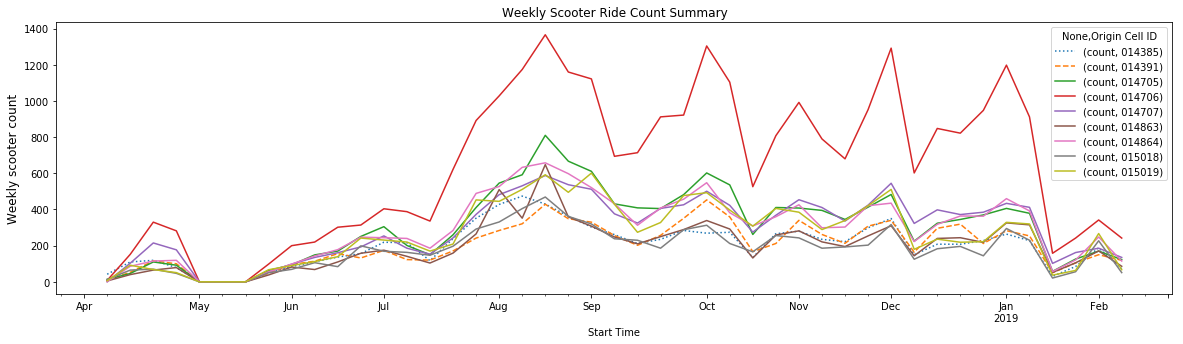

In [95]:
#plt.figure(figsize=(20,5))
weekly = t.resample('W').sum()
weekly.plot(style=[':', '--', '-'],figsize=(20, 5))

plt.title('Weekly Scooter Ride Count Summary')
plt.ylabel('Weekly scooter count', fontsize=12)
#plt.xlabel('Month', fontsize=12,rotation='horizontal')
#plt.xticks(rotation=90)
plt.savefig('../output/EDA/Weekly_Scooter_Top_10.png')
plt.show()

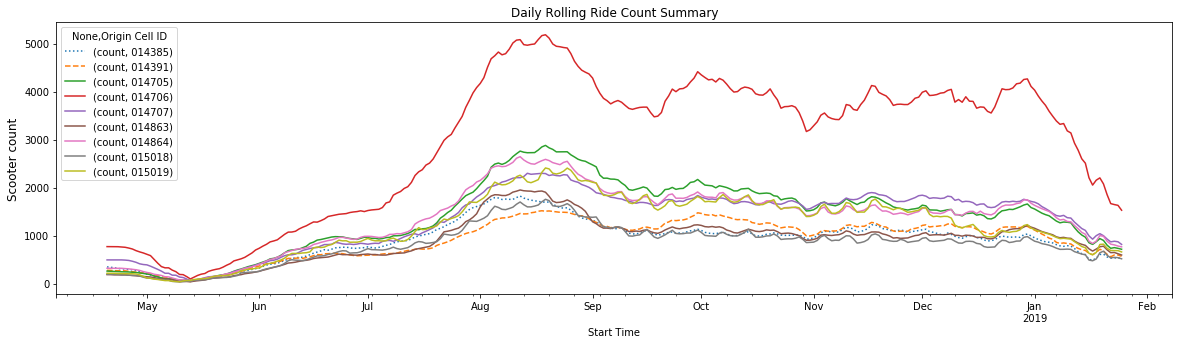

In [94]:
daily = t.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'],figsize=(20, 5))

plt.title('Daily Rolling Ride Count Summary')
plt.ylabel('Scooter count', fontsize=12)
#plt.xlabel('Month', fontsize=12,rotation='horizontal')
#plt.xticks(rotation=90)
plt.savefig('../output/EDA/Mean Hourly_Scooter_Top_10.png')
plt.show()

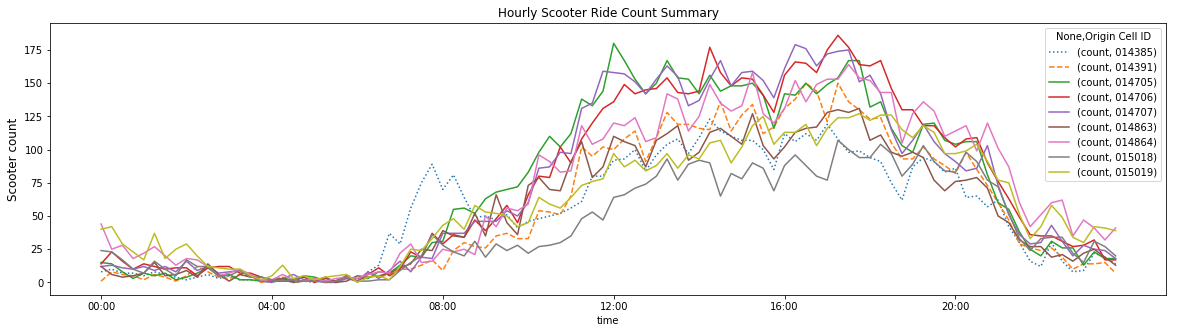

In [93]:
by_time = t.groupby(t.index.time).count()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'],figsize=(20, 5));
plt.title('Hourly Scooter Ride Count Summary')
plt.ylabel('Scooter count', fontsize=12)
#plt.xlabel('Month', fontsize=12,rotation='horizontal')
#plt.xticks(rotation=90)
plt.savefig('../output/EDA/Hour_Scooter_Top_10.png')
plt.show()

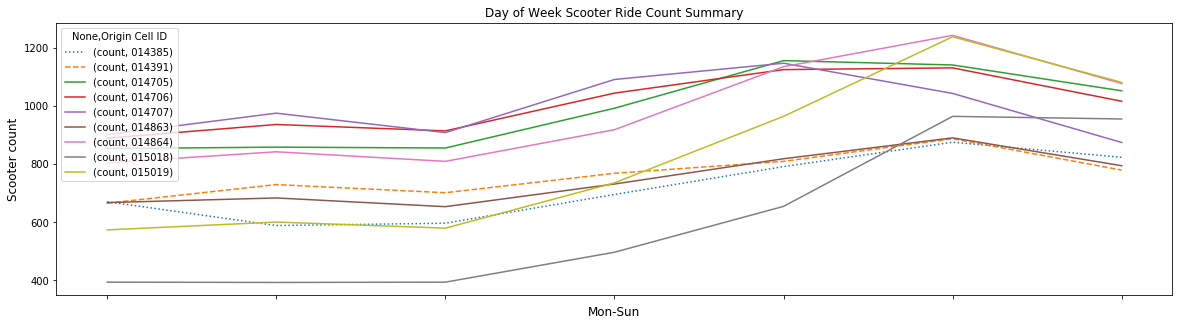

In [91]:
#fig, ax = plt.subplots(1, 1, figsize=(20, 5))

fig.set_size_inches(18.5, 10.5, forward=True)
by_weekday = t.groupby(t.index.dayofweek).count()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-'],figsize=(20, 5));
plt.title('Day of Week Scooter Ride Count Summary')
plt.ylabel('Scooter count', fontsize=12)
plt.xlabel('Mon-Sun', fontsize=12,rotation='horizontal')
#plt.xticks(rotation=90)
plt.savefig('../output/EDA/Day_of_Week_Scooter_Top_10.png')
plt.show()


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


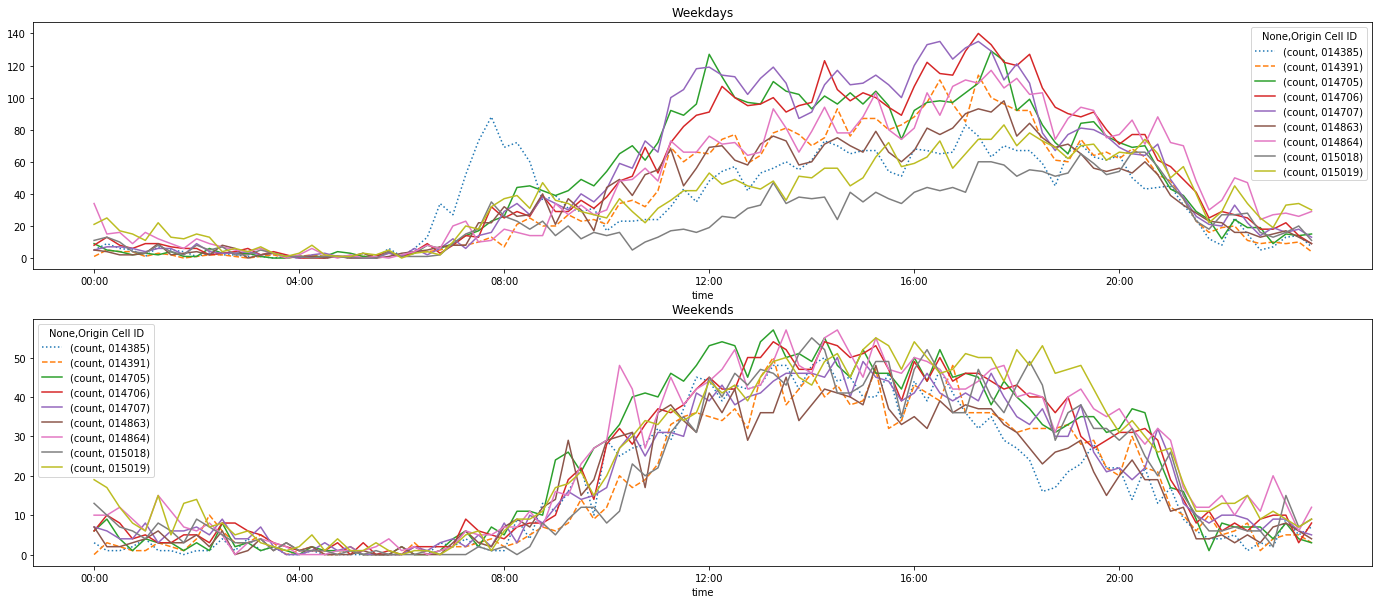

In [99]:
'''
This shows a strong distinction between weekday and weekend totals, 
with around twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.

With this in mind, let's do a compound GroupBy and look at the hourly trend on weekdays versus weekends. 
We'll start by grouping by both a flag marking the weekend, and the time of day:
'''
weekend = np.where(t.index.weekday < 5, 'Weekday', 'Weekend')
by_time = t.groupby([weekend, t.index.time]).count()
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 1, figsize=(24, 10))
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);
plt.savefig('../output/EDA/Weekday_Weekend_Top_10.png')
plt.show()